In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df = df.drop(['UDI','Product ID'], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
df_cat = df[['Type']]
df_cat

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


In [5]:
df_num = df.drop(['Type','Machine failure','TWF','HDF','PWF','OSF','RNF'], axis=1)
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df_num = scaler.fit_transform(df_num)
df_num

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [8]:
df_num = pd.DataFrame(df_num, columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
                                         ,'Torque [Nm]','Tool wear [min]'])
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336
9996,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.402174,0.358025,0.277648,0.406593,0.086957
9998,0.402174,0.370370,0.139697,0.614011,0.098814


In [9]:
# Alternate method for converting catagorical data to numerical data
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# cat = encoder.fit_transform(df_cat[['Type']]).toarray()

In [10]:
cat = pd.get_dummies(df_cat[['Type']], dtype=float)
df_cat = pd.DataFrame(cat)

df_cat

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [11]:
X = pd.concat([df_cat,df_num],axis=1)
X

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,0.0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,1.0,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,1.0,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.380435,0.333333,0.253783,0.353022,0.055336
9996,1.0,0.0,0.0,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.0,0.0,1.0,0.402174,0.358025,0.277648,0.406593,0.086957
9998,1.0,0.0,0.0,0.402174,0.370370,0.139697,0.614011,0.098814


In [12]:
y = df[['Machine failure']]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000, 1)
(2000, 1)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay

In [16]:
# Logistic Regression 
model_1 = LogisticRegression(random_state=30)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1s = f1_score(y_test,y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1927    0]
 [  72    1]]
Accuracy:  0.964
Recall:  0.0136986301369863
Precision:  1.0
F1 Score:  0.027027027027027025


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Logistic Regression adjusting class weight
model_2 = LogisticRegression(class_weight='balanced', random_state=30)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1s = f1_score(y_test,y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1570  357]
 [  16   57]]
Accuracy:  0.8135
Recall:  0.7808219178082192
Precision:  0.13768115942028986
F1 Score:  0.23408624229979466


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# Applying Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=30)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Initializing and train the logistic regression model
model_3 = LogisticRegression(random_state=30)
model_3.fit(X_train_undersampled, y_train_undersampled)

y_pred = model_3.predict(X_test)

# Evaluating the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1s = f1_score(y_test,y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1475  452]
 [  19   54]]
Accuracy:  0.7645
Recall:  0.7397260273972602
Precision:  0.1067193675889328
F1 Score:  0.18652849740932642


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Applying Random Oversampling
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=30)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Initializing and train the logistic regression model
model_4 = LogisticRegression(random_state=30)
model_4.fit(X_train_oversampled, y_train_oversampled)

y_pred = model_4.predict(X_test)

# Evaluating the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1s = f1_score(y_test,y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1570  357]
 [  15   58]]
Accuracy:  0.814
Recall:  0.7945205479452054
Precision:  0.13975903614457832
F1 Score:  0.23770491803278693


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Applying combination of Oversampling and Undersampling
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=30)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Initializing and train the logistic regression model
model_5 = LogisticRegression(random_state=30)
model_5.fit(X_train_resampled, y_train_resampled)

y_pred = model_5.predict(X_test)

# Evaluating the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1s = f1_score(y_test,y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1540  387]
 [  13   60]]
Accuracy:  0.8
Recall:  0.821917808219178
Precision:  0.1342281879194631
F1 Score:  0.23076923076923075


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


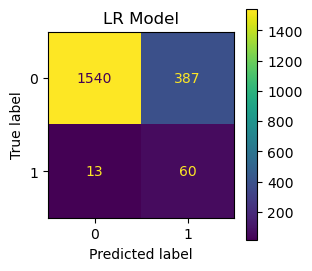

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=model_5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_5.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('LR Model')
disp.plot(ax=ax)